$$
\large \textbf{Problema 08}
$$

Evalúe, utilizando los métodos de Euler, de Heun y de Runge Kutta de cuarto orden, la ecuación diferencial:

$$
\frac{dy}{dx}=4\:e^{0.8x}-0.5y
$$

con la condición de contorno $y(0) = 2$, desde $x = 0$ hasta $x = 4$, con varios tamaños de paso. Compare la exactitud de los diferentes métodos con el resultado exacto en $x = 4$. Grafique este error en función del esfuerzo de cálculo realizado (cantidad de veces que tuvo que evaluar la función). Compare la soluciones numéricas obtenidas, $y(x)$, con la solución teórica:

$$
y(x)=\frac{4}{1.3}\:\left(e^{0.8x}-e^{-0.5x}\right)+2\:e^{-0.5x}
$$

***

In [1]:
import numpy as np                # Librería de álgebra lineal
import matplotlib.pyplot as plt   # Librería de gráficos
plt.rc('figure', figsize=(10,7))
plt.rc('font', size=14)

### Datos del problema

In [2]:
y0 = 2
x0 = 0
xf = 4
n = 5

def f(x,y):
    return 4*np.exp(0.8*x)-0.5*y

def y_teorica(x):
    return 4/1.3*(np.exp(0.8*x)-np.exp(-0.5*x))+2*np.exp(-0.5*x)

### Euler

In [3]:
def Euler(n, x0=0, xf=4, y0=2, f=f):
    x = np.linspace(x0, xf, n)
    h = x[1]-x[0]
    y = [y0]
        
    for k, xk in enumerate(x[:-1]):
        y.append(y[k]+h*f(xk, y[k]))
    
    return y

In [4]:
yEu = Euler(n, x0, xf, y0, f)

### Heun

In [5]:
def Heun(n, x0=0, xf=4, y0=2, f=f):
    x = np.linspace(x0, xf, n)
    h = x[1]-x[0]
    y = [y0]
    
    for k, xk in enumerate(x[:-1]):
        yk12 = y[k]+h/2*f(xk, y[k])
        y.append(y[k]+h*(f(xk+h/2, yk12)))
    
    return y

In [6]:
yHe = Heun(n, x0, xf, y0, f)

### Runge-Kutta de 4° orden

In [7]:
def RungeKutta(n, x0=0, xf=4, y0=2, f=f):
    x = np.linspace(x0, xf, n)
    h = x[1]-x[0]
    y = [y0]
    
    for i, xi in enumerate(x[:-1]):
        k1 = f(xi, y[i])
        k2 = f(xi+h/2, y[i]+k1*h/2)
        k3 = f(xi+h/2, y[i]+k2*h/2)
        k4 = f(xi+h, y[i]+k3*h)
        y.append(y[i]+h/6*(k1+2*k2+2*k3+k4))
    
    return y

In [8]:
yRK = RungeKutta(n, x0, xf, y0, f)

### Comparación

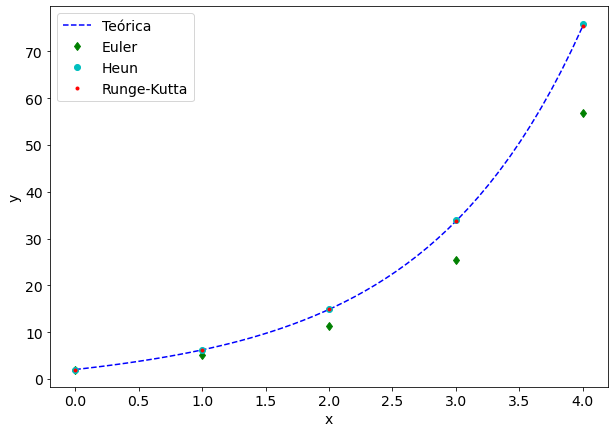

In [9]:
x = np.linspace(0, 4, n)
x_teo = np.linspace(0, 4, 50)
y_teo = y_teorica(x_teo)

plt.plot(x_teo, y_teo, linestyle='--', color='b', label='Teórica')
plt.plot(x, yEu, 'd', color='g', label='Euler')
plt.plot(x, yHe, 'o', color='c', label='Heun')
plt.plot(x, yRK, '.', color='r', label='Runge-Kutta')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

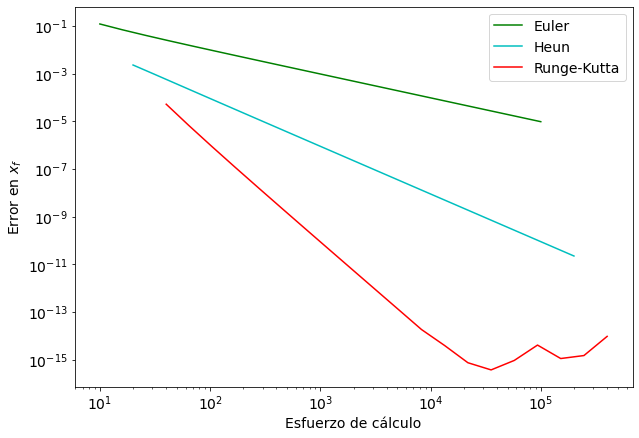

In [10]:
pasos = np.logspace(1, 5, 20).astype(int)
YEu = [Euler(p)[-1] for p in pasos]
YHe = [Heun(p)[-1] for p in pasos]
YRK = [RungeKutta(p)[-1] for p in pasos]

ErrEuler = np.abs((YEu-y_teo[-1])/YEu)
ErrHeun = np.abs((YHe-y_teo[-1])/YHe)
ErrRuKu = np.abs((YRK-y_teo[-1])/YRK)

plt.loglog(pasos, ErrEuler, '-', color='g', label='Euler')
plt.loglog(2*pasos, ErrHeun, '-', color='c', label='Heun')
plt.loglog(4*pasos, ErrRuKu, '-', color='r', label='Runge-Kutta')

plt.xlabel('Esfuerzo de cálculo')
plt.ylabel('Error en $x_f$')
plt.legend()
plt.show()